In [9]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [13]:
# Use the tuple() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

taolanaro mg
alofi nu
kapaa us
tautira pf
arraial do cabo br
paamiut gl
vaini to
saint-philippe re
ponta delgada pt
carnarvon au
araouane ml
atuona pf
bandarbeyla so
port elizabeth za
namibe ao
niquero cu
ilulissat gl
upernavik gl
east london za
luderitz na
lasa cn
barra do corda br
ushuaia ar
bambous virieux mu
tsihombe mg
naze jp
bayanday ru
deqing cn
ballina ie
kazachinskoye ru
ushuaia ar
samalaeulu ws
kaitangata nz
ostrovnoy ru
katsuura jp
zamora ec
coquimbo cl
carnarvon au
hobart au
shenjiamen cn
suez eg
mercedes uy
gweta bw
kaitangata nz
rikitea pf
san vicente ph
upernavik gl
cidreira br
tura ru
hobart au
roebourne au
new norfolk au
rikitea pf
albany au
hobart au
busselton au
saldanha za
taolanaro mg
kuandian cn
hithadhoo mv
fortuna us
vila do maio cv
khatanga ru
tomatlan mx
ushuaia ar
dikson ru
luderitz na
bluff nz
ushuaia ar
soe id
kruisfontein za
arraial do cabo br
upernavik gl
boende cd
sumenep id
trairi br
bredasdorp za
kaeo nz
vaini to
bud no
taolanaro mg
atasu kz
college u

emba kz
egvekinot ru
talnakh ru
jamestown sh
mys shmidta ru
burica pa
punta arenas cl
veraval in
meulaboh id
port alfred za
manzil salim tn
rikitea pf
cape town za
port alfred za
busselton au
vaitupu wf
port elizabeth za
castro cl
teya ru
torbay ca
taolanaro mg
yellowknife ca
esperance au
mys shmidta ru
honiara sb
vaini to
albany au
hobart au
rikitea pf
bredasdorp za
ushuaia ar
barentsburg sj
yulara au
sorland no
ushuaia ar
nikolskoye ru
taolanaro mg
kaitangata nz
qaanaaq gl
ushuaia ar
lata sb
mahebourg mu
albany au
provideniya ru
tiksi ru
chalmette us
bluff nz
gravdal no
albany au
mataura pf
verkhnevilyuysk ru
nikolskoye ru
busselton au
khatanga ru
norman wells ca
kodiak us
mangan in
sumenep id
zhigansk ru
victor harbor au
saint-georges gf
okato nz
tuktoyaktuk ca
cape town za
mataura pf
castro cl
ushuaia ar
kahului us
belushya guba ru
forecariah gn
lalmohan bd
albany au
taolanaro mg
punta arenas cl
yellowknife ca
busselton au
kayerkan ru
mataura pf
laguna br
taolanaro mg
rikitea pf
lo

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [17]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [18]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dfb84eeff8f8990d42243f4ec5e39264


In [19]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dfb84eeff8f8990d42243f4ec5e39264&q=Boston


In [20]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | alofi
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | tautira
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | paamiut
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | ponta delgada
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | araouane
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | bandarbeyla
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | namibe
Processing Record 16 of Set 1 | niquero
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | luderitz
Processing Record 21 of Set 1 | lasa
Processing Record 22 of Set 1 | barra do corda

Processing Record 40 of Set 4 | sitka
Processing Record 41 of Set 4 | vanimo
Processing Record 42 of Set 4 | vilhena
Processing Record 43 of Set 4 | dalmatovo
Processing Record 44 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 45 of Set 4 | tuatapere
Processing Record 46 of Set 4 | san jeronimo
Processing Record 47 of Set 4 | beira
Processing Record 48 of Set 4 | nikolskoye
Processing Record 49 of Set 4 | presidencia roque saenz pena
Processing Record 50 of Set 4 | zhigansk
Processing Record 1 of Set 5 | haines junction
Processing Record 2 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 5 | slave lake
Processing Record 4 of Set 5 | oktyabrskoye
Processing Record 5 of Set 5 | abu zabad
Processing Record 6 of Set 5 | zachagansk
City not found. Skipping...
Processing Record 7 of Set 5 | port hardy
Processing Record 8 of Set 5 | clyde river
Processing Record 9 of Set 5 | karratha
Processing Record 10 of Set 5 | karaul
City not found. Sk

Processing Record 28 of Set 8 | burica
City not found. Skipping...
Processing Record 29 of Set 8 | veraval
Processing Record 30 of Set 8 | manzil salim
Processing Record 31 of Set 8 | teya
Processing Record 32 of Set 8 | sorland
Processing Record 33 of Set 8 | lata
Processing Record 34 of Set 8 | tiksi
Processing Record 35 of Set 8 | chalmette
Processing Record 36 of Set 8 | gravdal
Processing Record 37 of Set 8 | mangan
Processing Record 38 of Set 8 | victor harbor
Processing Record 39 of Set 8 | saint-georges
Processing Record 40 of Set 8 | okato
Processing Record 41 of Set 8 | kahului
Processing Record 42 of Set 8 | forecariah
Processing Record 43 of Set 8 | lalmohan
Processing Record 44 of Set 8 | kayerkan
Processing Record 45 of Set 8 | longyearbyen
Processing Record 46 of Set 8 | praia da vitoria
Processing Record 47 of Set 8 | divnogorsk
Processing Record 48 of Set 8 | inhambane
Processing Record 49 of Set 8 | finschhafen
Processing Record 50 of Set 8 | colares
Processing Record

Processing Record 21 of Set 12 | launceston
Processing Record 22 of Set 12 | sydney
Processing Record 23 of Set 12 | pimenta bueno
Processing Record 24 of Set 12 | yarim
Processing Record 25 of Set 12 | tanda
Processing Record 26 of Set 12 | shiraz
Processing Record 27 of Set 12 | marawi
Processing Record 28 of Set 12 | dubbo
Processing Record 29 of Set 12 | san andres
Processing Record 30 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 31 of Set 12 | gilgit
Processing Record 32 of Set 12 | neryungri
Processing Record 33 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 34 of Set 12 | vestmannaeyjar
Processing Record 35 of Set 12 | luganville
Processing Record 36 of Set 12 | atherton
Processing Record 37 of Set 12 | huanan
Processing Record 38 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 39 of Set 12 | lillehammer
Processing Record 40 of Set 12 | bilibino
Processing Record 41 of Set 12 | tiznit
Processing Record 42 of Set

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Alofi,-19.0595,-169.9187,84.20,79,17,14.97,NU,2021-03-28 00:11:21
1,Kapaa,22.0752,-159.3190,78.80,69,40,12.66,US,2021-03-28 00:11:22
2,Tautira,-17.7333,-149.1500,87.80,58,40,11.50,PF,2021-03-28 00:11:22
3,Arraial Do Cabo,-22.9661,-42.0278,78.80,78,0,4.61,BR,2021-03-28 00:11:22
4,Paamiut,61.9940,-49.6678,1.60,79,3,25.41,GL,2021-03-28 00:11:23
5,Vaini,-21.2000,-175.2000,86.00,74,75,6.91,TO,2021-03-28 00:11:23
6,Saint-Philippe,-21.3585,55.7679,75.20,83,0,5.75,RE,2021-03-28 00:11:23
7,Ponta Delgada,37.7333,-25.6667,51.80,82,20,1.70,PT,2021-03-28 00:09:19
8,Carnarvon,-24.8667,113.6333,78.80,73,0,2.01,AU,2021-03-28 00:11:24
9,Araouane,18.9048,-3.5265,74.89,7,0,11.12,ML,2021-03-28 00:09:26


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Alofi,NU,2021-03-28 00:11:21,-19.0595,-169.9187,84.20,79,17,14.97
1,Kapaa,US,2021-03-28 00:11:22,22.0752,-159.3190,78.80,69,40,12.66
2,Tautira,PF,2021-03-28 00:11:22,-17.7333,-149.1500,87.80,58,40,11.50
3,Arraial Do Cabo,BR,2021-03-28 00:11:22,-22.9661,-42.0278,78.80,78,0,4.61
4,Paamiut,GL,2021-03-28 00:11:23,61.9940,-49.6678,1.60,79,3,25.41
5,Vaini,TO,2021-03-28 00:11:23,-21.2000,-175.2000,86.00,74,75,6.91
6,Saint-Philippe,RE,2021-03-28 00:11:23,-21.3585,55.7679,75.20,83,0,5.75
7,Ponta Delgada,PT,2021-03-28 00:09:19,37.7333,-25.6667,51.80,82,20,1.70
8,Carnarvon,AU,2021-03-28 00:11:24,-24.8667,113.6333,78.80,73,0,2.01
9,Araouane,ML,2021-03-28 00:09:26,18.9048,-3.5265,74.89,7,0,11.12


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [26]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1616890481.90222

In [27]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'03/27/21'

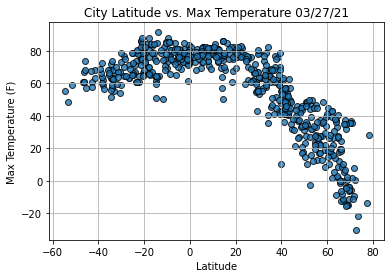

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

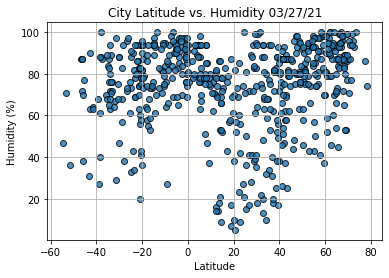

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

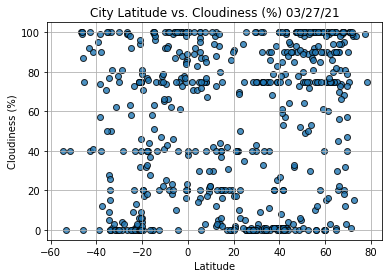

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

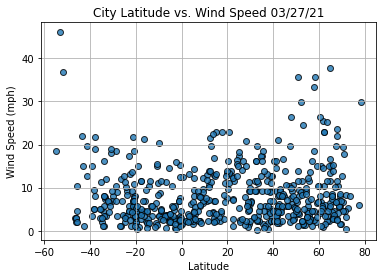

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [47]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
# def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

        # Run regression on hemisphere weather data.
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

        # Calculate the regression line "y values" from the slope and intercept.
        regress_values = x_values * slope + intercept
        # Get the equation of the line.
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        # Create a scatter plot and plot the regression line.
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
        # Annotate the text for the line equation.
        plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.show()

In [48]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Kapaa,US,2021-03-28 00:11:22,22.0752,-159.3190,78.80,69,40,12.66
4,Paamiut,GL,2021-03-28 00:11:23,61.9940,-49.6678,1.60,79,3,25.41
7,Ponta Delgada,PT,2021-03-28 00:09:19,37.7333,-25.6667,51.80,82,20,1.70
9,Araouane,ML,2021-03-28 00:09:26,18.9048,-3.5265,74.89,7,0,11.12
11,Bandarbeyla,SO,2021-03-28 00:11:25,9.4942,50.8122,77.83,80,22,9.64


In [49]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

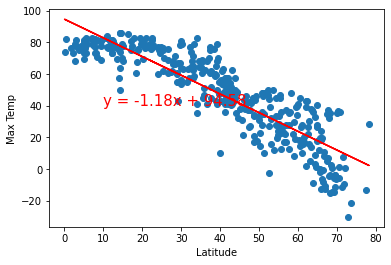

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

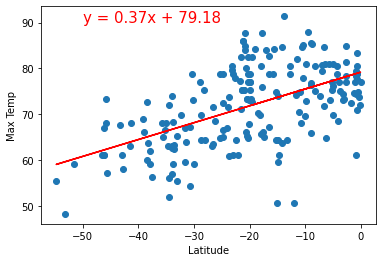

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

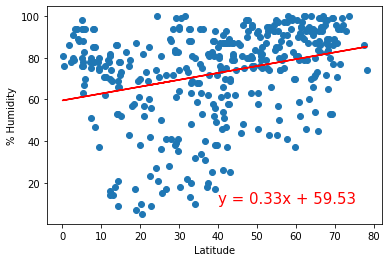

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

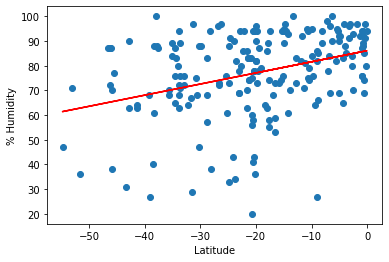

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))


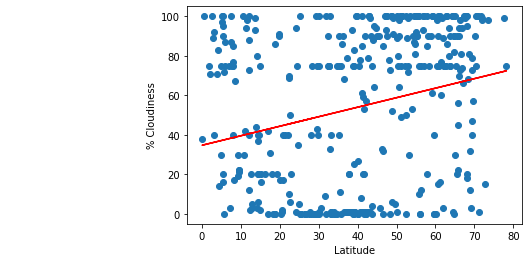

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

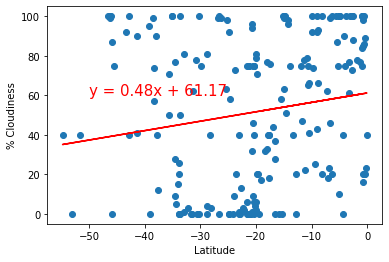

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

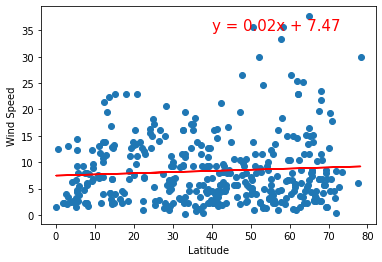

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))


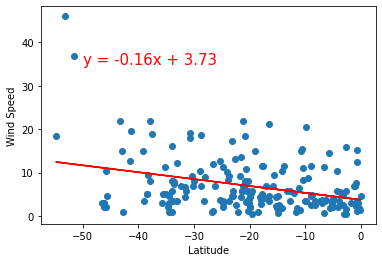

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))